# Stereographic Projection to 3D bloch sphere

## Package Import

In [814]:
import numpy as np
from PIL import Image
from qiskit.visualization import plot_bloch_vector

## Define Project Function

In [706]:
def project(img, h_img, w_img, h_proj, w_proj):

    (row, col, _) = img
    x = row
    y = col
    z = 0
    print("x,y,z = ",x,y,z)
    Q = np.array([x, y, z], dtype=np.float32)
    X = get_2d_to_3d(Q)
    return X

def get_2d_to_3d(point):
    [x, y, z] = point
    k = round(4 / (x**2 + y**2 + 4), 4)
    print("k = ", k)

    return np.array([k * x, k * y, 1-2*k ])

## Project 2D Pixel on Bloch Sphere

In [754]:
import os
os.path.abspath('')

'c:\\Users\\HCI\\Desktop\\Stereo'

### 1X1 Pixel

In [725]:
path_img_1 = 'pixel1x1.png'
path_img_1 = os.path.join(os.path.abspath(''),
                            path_img_1)
print(path_img_1)

c:\Users\HCI\Desktop\Stereo\pixel1x1.png


In [756]:
pix = np.array(Image.open(path_img_1))

h_img = pix.shape[0]
w_img = pix.shape[1]
h_proj_2 = 1
w_proj_2 = 1

x = 1.1

proj_1 = np.array([[x,x,0]])

point_2d = []
point_3d = []

for i in proj_1:
    sphere = project(i, h_img, w_img, h_proj_2, w_proj_2)
    point_2d.append(i)    
    point_3d.append(sphere)

print('point_2d = ', point_2d)
print('point_3d = ', point_3d)

x,y,z =  1.1 1.1 0
k =  0.6231
point_2d =  [array([1.1, 1.1, 0. ])]
point_3d =  [array([ 0.68541001,  0.68541001, -0.2462    ])]


[array([1.1, 1.1, 0. ])]


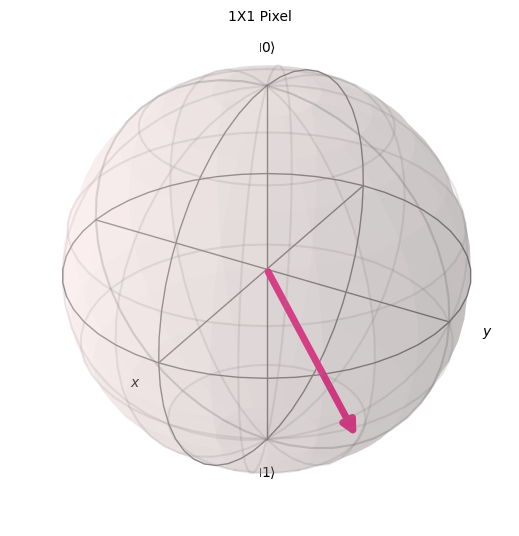

In [757]:
print(point_2d)
plot_bloch_vector(point_2d, title='1X1 Pixel')

point_3d =  [array([ 0.68541001,  0.68541001, -0.2462    ])]


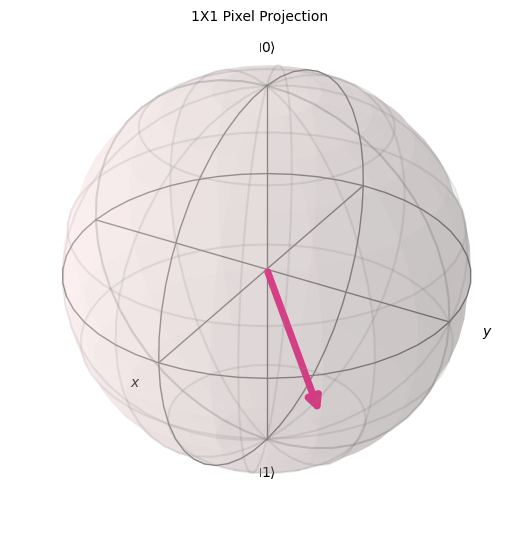

In [758]:
print('point_3d = ', point_3d)
plot_bloch_vector(point_3d, title='1X1 Pixel Projection')

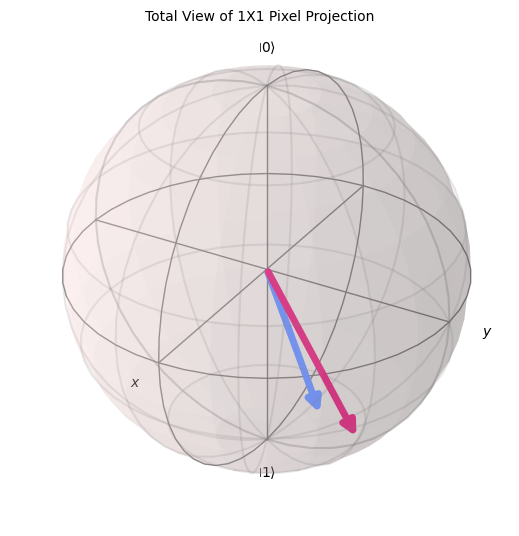

In [759]:
plot_bloch_vector(point_2d+point_3d, title='Total View of 1X1 Pixel Projection')

### 2X2 Pixel

In [760]:
path_img_2 = 'pixel2x2.png'
path_img_2 = os.path.join(os.path.abspath(''),
                            path_img_2)
print(path_img_2)

c:\Users\HCI\Desktop\Stereo\pixel2x2.png


In [761]:
pix = np.array(Image.open(path_img_2))

h_img = pix.shape[0]
w_img = pix.shape[1]
h_proj_2 = 2
w_proj_2 = 2

x = 0.8

proj_2 = np.array([[x,x,0],
                 [-1.1*x,1.1*x,0],
                 [-1.2*x,-1.2*x,0],
                 [x,-x,0]])

point_2d = []
point_3d = []

for i in proj_2:
    sphere = project(i, h_img, w_img, h_proj_2, w_proj_2)
    point_2d.append(i)    
    point_3d.append(sphere)

print('point_2d = ', point_2d)
print('point_3d = ', point_3d)

x,y,z =  0.8 0.8 0
k =  0.7576
x,y,z =  -0.8800000000000001 0.8800000000000001 0
k =  0.7209
x,y,z =  -0.96 -0.96 0
k =  0.6846
x,y,z =  0.8 -0.8 0
k =  0.7576
point_2d =  [array([0.8, 0.8, 0. ]), array([-0.88,  0.88,  0.  ]), array([-0.96, -0.96,  0.  ]), array([ 0.8, -0.8,  0. ])]
point_3d =  [array([ 0.60608001,  0.60608001, -0.5152    ]), array([-0.634392,  0.634392, -0.4418  ]), array([-0.65721599, -0.65721599, -0.3692    ]), array([ 0.60608001, -0.60608001, -0.5152    ])]


[array([0.8, 0.8, 0. ]), array([-0.88,  0.88,  0.  ]), array([-0.96, -0.96,  0.  ]), array([ 0.8, -0.8,  0. ])]


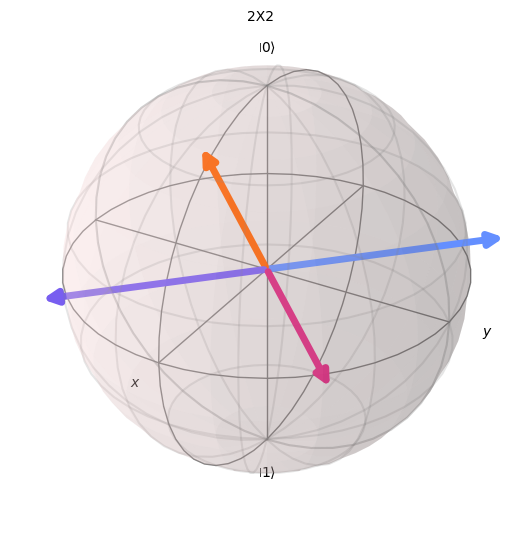

In [762]:
print(point_2d)
plot_bloch_vector(point_2d, title='2X2')

[array([ 0.60608001,  0.60608001, -0.5152    ]), array([-0.634392,  0.634392, -0.4418  ]), array([-0.65721599, -0.65721599, -0.3692    ]), array([ 0.60608001, -0.60608001, -0.5152    ])]


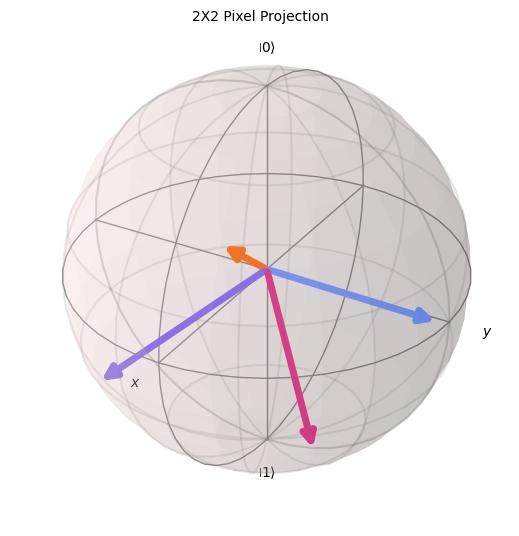

In [763]:
print(point_3d)
plot_bloch_vector(point_3d, title='2X2 Pixel Projection')

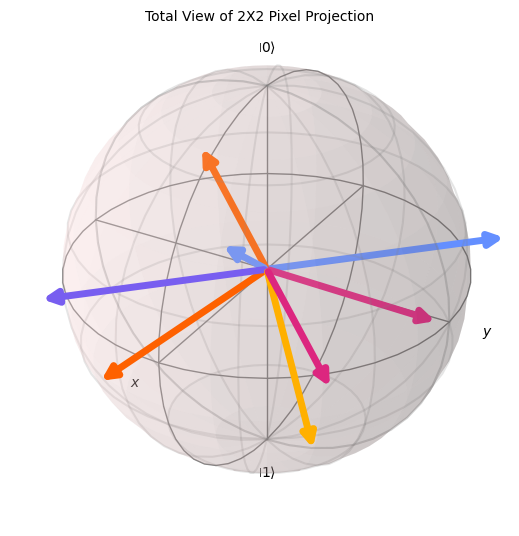

In [764]:
plot_bloch_vector(point_2d+point_3d, title='Total View of 2X2 Pixel Projection')

### 3X3 Pixel

In [765]:
path_img_3 = 'pixel3x3.png'
path_img_3 = os.path.join(os.path.abspath(''),
                            path_img_3)
print(path_img_3)

c:\Users\HCI\Desktop\Stereo\pixel3x3.png


In [792]:
pix = np.array(Image.open(path_img_3))

h_img = pix.shape[0]
w_img = pix.shape[1]
h_proj_3 = 3
w_proj_3 = 3

x = 0.9

pixel = np.array([[-1.3*x,x,0],[0,1.3*x,0],[1.1*x,1.1*x,0],
                   [-1.5*x,0,0],[1.7*x,0,0],
                 [-1.1*x,-1.6*x,0],[0,-0.8*x,0],[1.3*x,-1.2*x,0]])

point_2d = []
point_3d = []


for i in pixel:
    sphere = project(i,h_img, w_img, h_proj_3, w_proj_3)
    point_2d.append(i)
    point_3d.append(sphere)

print('point_2d = ', point_2d)
print('point_3d = ', point_3d)

x,y,z =  -1.1700000000000002 0.9 0
k =  0.6474
x,y,z =  0.0 1.1700000000000002 0
k =  0.745
x,y,z =  0.9900000000000001 0.9900000000000001 0
k =  0.6711
x,y,z =  -1.35 0.0 0
k =  0.687
x,y,z =  1.53 0.0 0
k =  0.6308
x,y,z =  -0.9900000000000001 -1.4400000000000002 0
k =  0.5671
x,y,z =  0.0 -0.7200000000000001 0
k =  0.8853
x,y,z =  1.1700000000000002 -1.08 0
k =  0.6121
point_2d =  [array([-1.17,  0.9 ,  0.  ]), array([0.  , 1.17, 0.  ]), array([0.99, 0.99, 0.  ]), array([-1.35,  0.  ,  0.  ]), array([1.53, 0.  , 0.  ]), array([-0.99, -1.44,  0.  ]), array([ 0.  , -0.72,  0.  ]), array([ 1.17, -1.08,  0.  ])]
point_3d =  [array([-0.75745797,  0.58265998, -0.2948    ]), array([ 0.        ,  0.87164997, -0.49      ]), array([ 0.66438901,  0.66438901, -0.3422    ]), array([-0.92745002,  0.        , -0.374     ]), array([ 0.96512398,  0.        , -0.2616    ]), array([-0.56142901, -0.81662403, -0.1342    ]), array([ 0.        , -0.63741603, -0.7706    ]), array([ 0.71615697, -0.66106803,

point_2d =  [array([-1.17,  0.9 ,  0.  ]), array([0.  , 1.17, 0.  ]), array([0.99, 0.99, 0.  ]), array([-1.35,  0.  ,  0.  ]), array([1.53, 0.  , 0.  ]), array([-0.99, -1.44,  0.  ]), array([ 0.  , -0.72,  0.  ]), array([ 1.17, -1.08,  0.  ])]


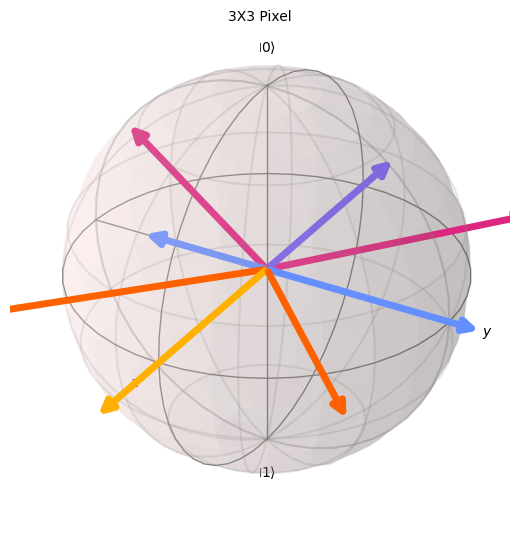

In [793]:
print('point_2d = ', point_2d)
plot_bloch_vector(point_2d, title='3X3 Pixel')

point_3d =  [array([-0.75745797,  0.58265998, -0.2948    ]), array([ 0.        ,  0.87164997, -0.49      ]), array([ 0.66438901,  0.66438901, -0.3422    ]), array([-0.92745002,  0.        , -0.374     ]), array([ 0.96512398,  0.        , -0.2616    ]), array([-0.56142901, -0.81662403, -0.1342    ]), array([ 0.        , -0.63741603, -0.7706    ]), array([ 0.71615697, -0.66106803, -0.2242    ])]


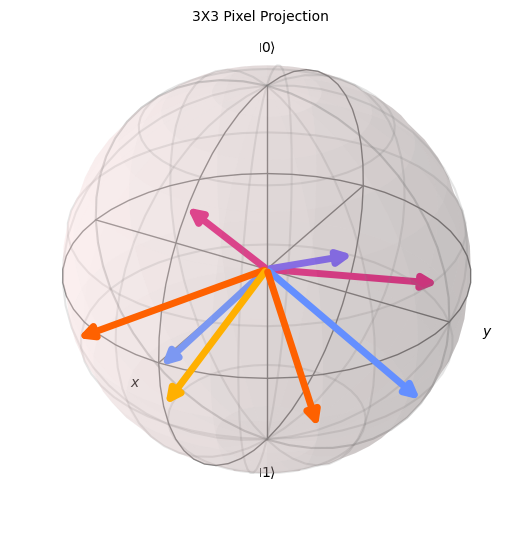

In [796]:
print('point_3d = ', point_3d)
plot_bloch_vector(point_3d, title='3X3 Pixel Projection')

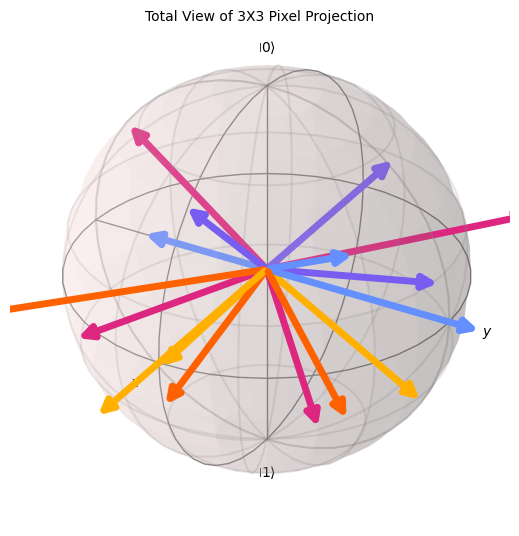

In [797]:
plot_bloch_vector(point_2d+point_3d, title='Total View of 3X3 Pixel Projection')

## Pixel Re-projection

### 1x1 Pixel Re-projection

#### Prepare Pixel

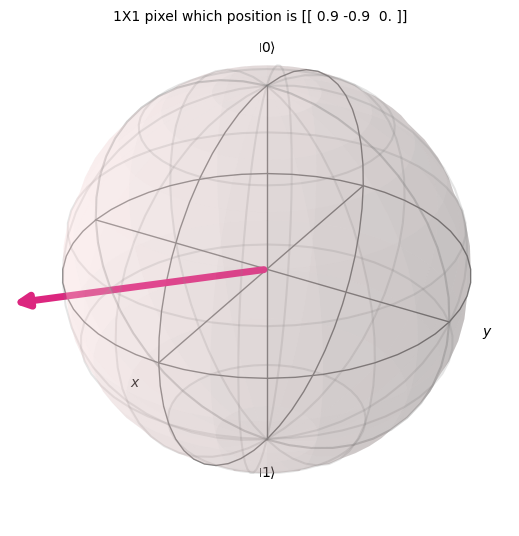

In [841]:
Q = np.array([[0.9,-0.9,0]])

plot_bloch_vector(Q, title = f'1X1 pixel which position is {Q}')

#### Project Pixel

In [842]:
h_img = Q.shape[0]
w_img = Q.shape[1]
h_proj = 1
w_proj = 1

point_2d = []
point_3d = []

for i in Q:
    P = project(i, h_img, w_img, h_proj, w_proj)
    point_2d.append(i)    
    point_3d.append(P)

x,y,z =  0.9 -0.9 0
k =  0.7117


point_2d =  [array([ 0.9, -0.9,  0. ])]
point_3d =  [array([ 0.64052998, -0.64052998, -0.4234    ])]


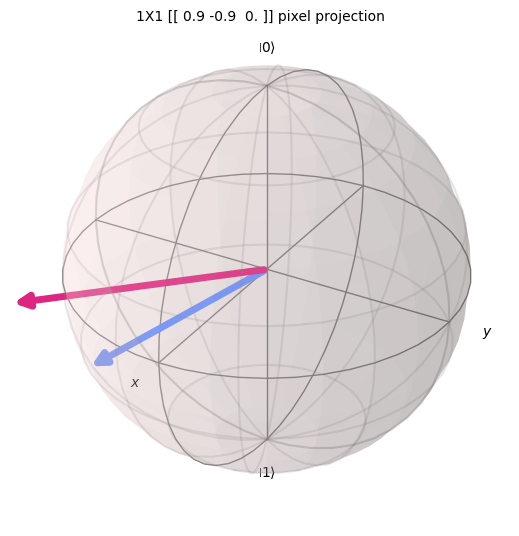

In [843]:
print('point_2d = ', point_2d)
print('point_3d = ', point_3d)
plot_bloch_vector(point_2d+point_3d, title = f'1X1 {Q} pixel projection')

#### Re-project projected pixel 

[ 0.89999998 -0.89999998  0.        ]


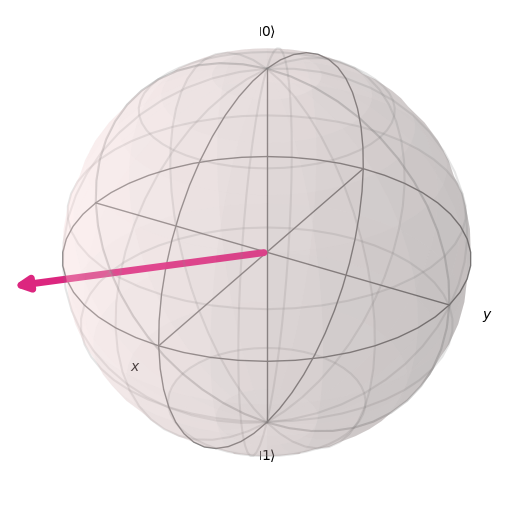

In [844]:
k = round( 4 /(Q[0][0]**2 + Q[0][1]**2 + 4),4)
Q_re = np.array([P[0]/k,P[1]/k, 0])
print(Q_re)
plot_bloch_vector(Q_re)

x,y,z =  0.899999976158142 -0.899999976158142 0
k =  0.7117


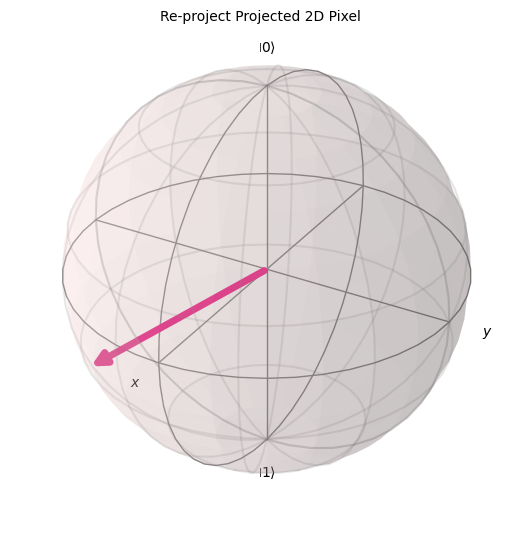

In [845]:
# Project Re-projected point

Q_re_re = project(Q_re, 1, 1, 1, 1)

plot_bloch_vector(Q_re_re, title='Re-project Projected 2D Pixel')

## Project a pixel using QuantumCircuit

### 1X1 Pixel

In [815]:
from math import pi
import numpy as np
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector

In [866]:
Q = np.array([1.1,1.1,0]) # 2D pixel coordinate

# Project 2D pixel on Bloch Sphere

P = project(Q,1,1,1,1)

x,y,z =  1.1 1.1 0
k =  0.6231


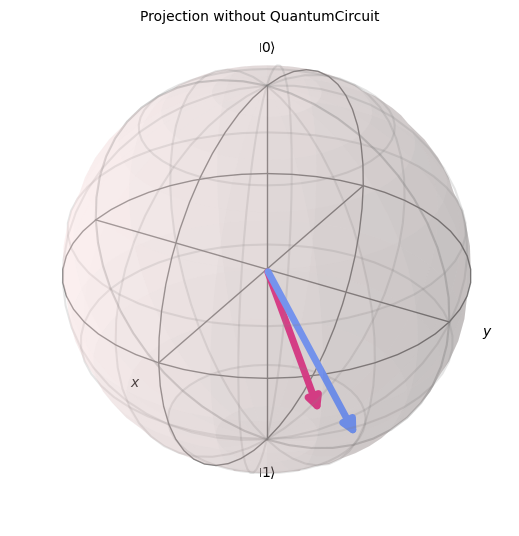

In [867]:
plot_bloch_vector([P]+[Q], title = 'Projection without QuantumCircuit')

### Prepare 2D Pixel with QuantumCircuit

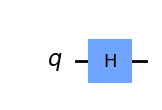

In [910]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(1)
qc.h(0)
qc.draw('mpl')

phi =  0.7853981633974483


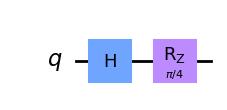

In [911]:
phi = np.arctan2(Q[1],Q[0])

print("phi = ", phi)

qc.rz(phi,0)
qc.draw('mpl')

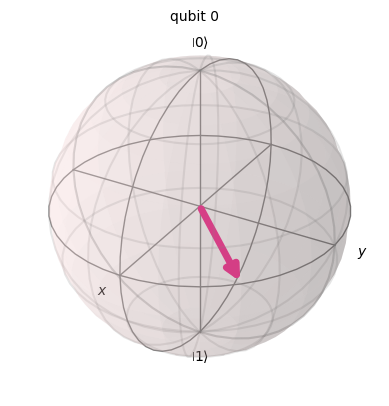

In [912]:
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

##### Analyze the state that passed through the Quantum Gates

In [913]:
from numpy import sqrt, arccos
print(state)

# Rz = np.array([[e^(-i*phi/2),0],
#                [0, e^(i*phi/2)])
# H = 1 / sqrt(2) np.array([[1,1],
#                          [1,-1]])
# 1/sqrt(2) * cos(phi/2) = 0.65328148

x = 2 * arccos(sqrt(2)*0.65328148)
print(x * 180 / pi) # radian to pi

Statevector([0.65328148-0.27059805j, 0.65328148+0.27059805j],
            dims=(2,))
45.00000103251222


### 2D pixel과 project 시킨 pixel 사이의 각도 $\theta$ 를 구해서 Gate에 대입

x,y,z =  1.1 1.1 0
k =  0.6231
P =  [ 0.68541001  0.68541001 -0.2462    ]


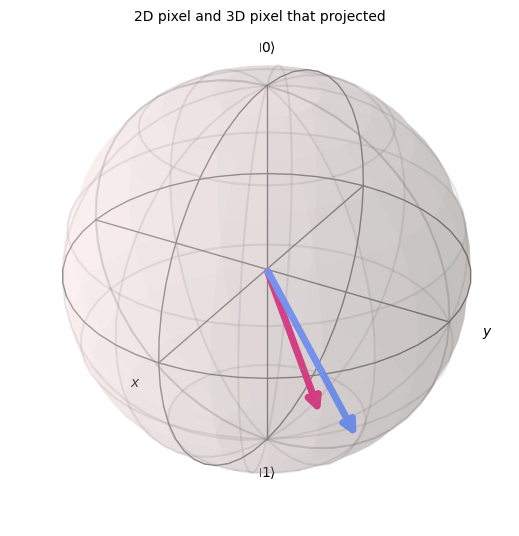

In [914]:
P = project(Q,1,1,1,1)
print("P = ", P)
plot_bloch_vector([P]+[Q], "2D pixel and 3D pixel that projected")

k =  0.6231 Inner =  1.5079020326828956
theta =  0.24836293810493312


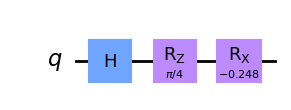

In [915]:
x, y = Q[0:2]
k = round(4 / (x**2 + y**2 + 4), 4)
Inner = Q.dot(P)
print("k = ", k, "Inner = ", Inner)
theta =  np.arccos(Inner / (np.sqrt((x**2 + y**2))))

print("theta = ", theta)
if P[2] > 0:
    qc.rx(theta, 0)
else:
    qc.rx(-theta, 0)
qc.draw('mpl')

Statevector([0.61473385-0.18759717j, 0.68176778+0.34943139j],
            dims=(2,))


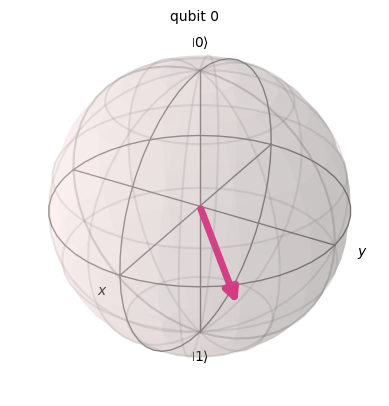

In [916]:
state = Statevector.from_instruction(qc)
print(state)
plot_bloch_multivector(state)

In [917]:
# QuantumCircuit의 Quantum gate를 지난 state의 theta 검산
from numpy import cos
from numpy import arccos
print(state)
m = 0
for i in range(2):
    m += state[i]
print(m)
theta_quantum = 2 * arccos(np.real(m)/ (np.sqrt(2) * cos(phi/2)))
print(theta_quantum)

Statevector([0.61473385-0.18759717j, 0.68176778+0.34943139j],
            dims=(2,))
(1.296501626462133+0.16183421692457667j)
0.2483629381049359


### Backward Projection with QuantumCircuit

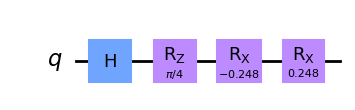

In [918]:
if P[2] > 0:
    qc.rx(-theta, 0)
else:
    qc.rx(+theta, 0)
qc.draw('mpl')

Statevector([0.65328148-0.27059805j, 0.65328148+0.27059805j],
            dims=(2,))


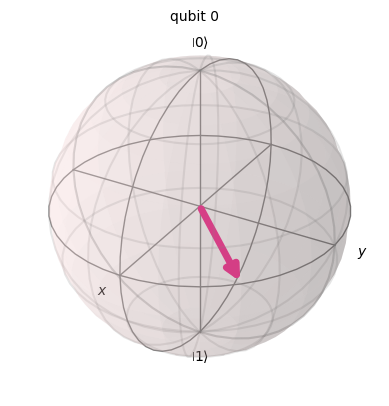

In [920]:
state = Statevector.from_instruction(qc)
print(state)
plot_bloch_multivector(state)

In [889]:
if P[2] > 0:
    plot_bloch_vector([1,np.pi/2-theta_quantum,phi], coord_type = 'spherical')
elif P[2] < 0:
    plot_bloch_vector([1,np.pi/2+theta_quantum,phi], coord_type = 'spherical')
else:
    plot_bloch_vector([1,np.pi/2,phi], coord_type = 'spherical')

## Compose QuantumCircuit that translated 2D image

In [922]:
from qiskit import QuantumCircuit, QuantumRegister

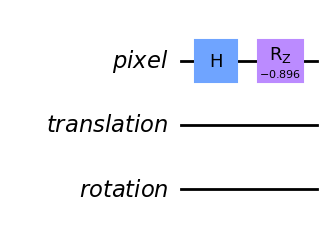

In [940]:
Q = np.array([2,-2.5,0]) # Given Pixel Coordinate

phi = np.arctan2(Q[1],Q[0])

pixel = QuantumRegister(size=1, name='pixel')
translation = QuantumRegister(size=1, name='translation')
rotation = QuantumRegister(size=1, name = 'rotation')

qc_t = QuantumCircuit(pixel,translation, rotation)
qc_t.h(0)
qc_t.rz(phi,0)
qc_t.draw('mpl')

x,y,z =  2.0 -2.5 0
k =  0.2807
P =  [ 0.5614  -0.70175  0.4386 ]
Inner =  2.8771750000000003
theta =  0.45404914559298576


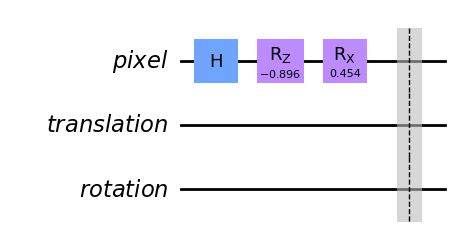

In [941]:
x, y = Q[0:2]
k = round(4 / (x**2 + y**2 + 4), 4)
P = project(Q,1,1,1,1)
print("P = ", P)
Inner = Q.dot(P)
print("Inner = ", Inner)
theta =  np.arccos(Inner / (np.sqrt((x**2 + y**2))))
print("theta = ", theta)

if P[2] > 0:
    qc_t.rx(theta, 0)
else:
    qc_t.rx(-theta, 0)

qc_t.barrier()
qc_t.draw('mpl')

In [939]:
from qiskit.quantum_info import Pauli
from qiskit.quantum_info.operators import Operator, Pauli
X = Pauli('X')
Y = Pauli('Y')

X = Operator(X)
Y = Operator(Y)
K = X.compose(Y, front=False)
K

Operator([[0.-1.j, 0.+0.j],
          [0.+0.j, 0.+1.j]],
         input_dims=(2,), output_dims=(2,))

In [951]:
state = Statevector.from_instruction(qc_t)
print(state)

Statevector([0.55804728+0.02609096j, 0.55804728-0.5708108j ,
             0.12891282+0.00602719j, 0.12891282-0.13186128j,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ],
            dims=(2, 2, 2))


In [958]:
qc_tr = QuantumCircuit(1)
qc_tr.ry(1.2, 0)
State = Operator(qc_tr)
State

Operator([[ 0.82533561+0.j, -0.56464247+0.j],
          [ 0.56464247+0.j,  0.82533561+0.j]],
         input_dims=(2,), output_dims=(2,))

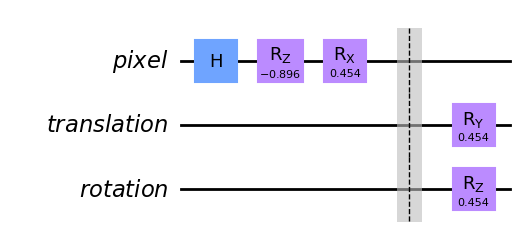

In [942]:
qc_t.ry(theta,1)
qc_t.rz(theta,2)
qc_t.draw('mpl')

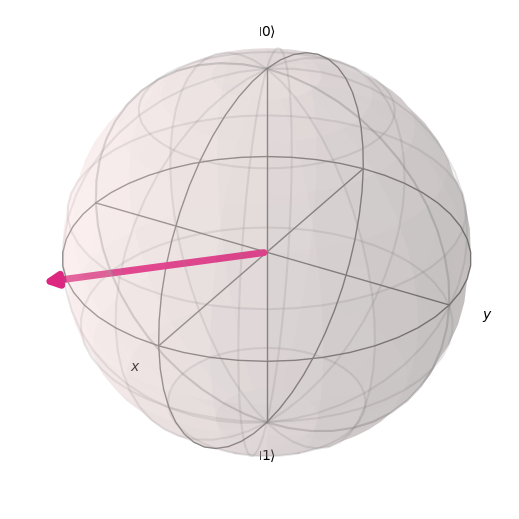

In [600]:
plot_bloch_vector(Q)

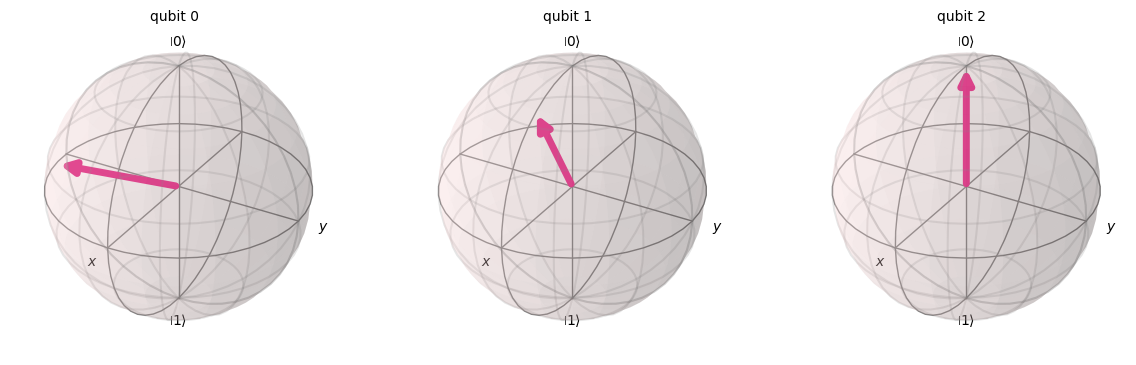

In [601]:
state = Statevector.from_instruction(qc_t)
plot_bloch_multivector(state)

In [586]:
P = project(Q,1,1,1,1)

x,y,z =  0.8 -0.8 0
k =  0.7576


[ 0.60608001 -0.60608001 -0.5152    ]


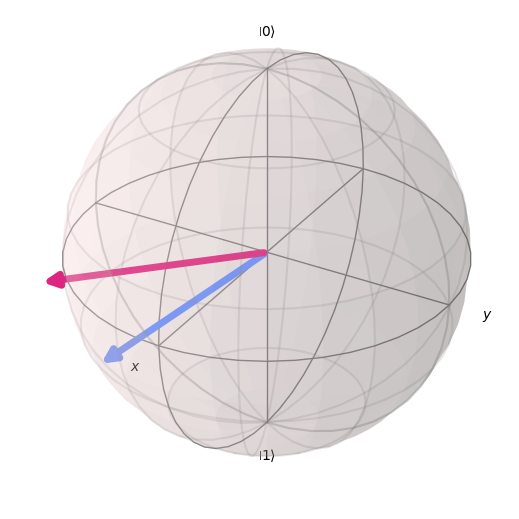

In [587]:
print(P)
plot_bloch_vector([Q]+[P])

In [602]:
qc=  QuantumCircuit(1)

0.026144 3.8889000000000005
theta =  1.246553700817408


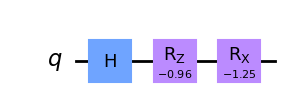

In [405]:
# Classical Computation을 통해 Projection 된 좌표를 구한 다음 theta값 구하기

x,y,z = Q
k = round(4 / (x**2 + y**2 + 4), 6)
Inner = Q.dot(P)
print(k, Inner)
theta =  np.arccos(Inner / 
                (np.sqrt((x**2 + y**2)) * np.sqrt(((k * x)**2 + (k * y)**2 + (2*(1-k)-1)**2 ))))

print("theta = ", theta)
qc.rx(-theta, 0)
qc.draw('mpl')

Statevector([0.69986491+0.63123761j, 0.31865197+0.10094114j],
            dims=(2,))


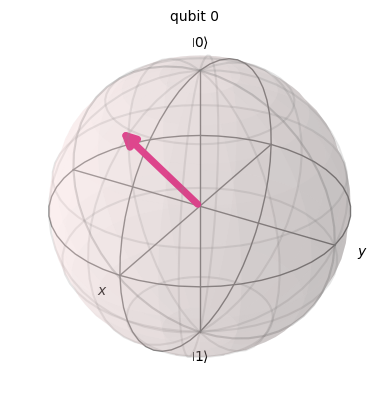

In [406]:
state = Statevector.from_instruction(qc)
print(state)
plot_bloch_multivector(state)

### Q(x,y,0) 에서 Q(x+u,y,0) 로 이동하는 것을 Bloch Sphere 상에서 회전을 통해 구현

In [274]:
# Q는 어차피 Bloch Sphere 상의 P좌표에서 x,y 값과 크기만을 이용할 것이므로 
# x->x+u으로 이동시키면서, y 값은 변하지않는, 쓰지 않을 값인 z 값을 모두 만족시키는 회전인
#Rygate의 각 rho를 구하면 된다.

In [408]:
Q = np.array([7,-10,0])
P = project(Q,1,1,1,1)
x,y,z = Q
k = round(4 / (x**2 + y**2 + 4), 4)
print("Q = ", Q, "P = ", P, "k = ", k)

x,y,z =  7 -10 0
k =  0.0261
Q =  [  7 -10   0] P =  [ 0.1827 -0.261   0.9478] k =  0.0261


In [409]:
# Q를 projection한 P를 얼마나 회전하면 
# x -> x+u 만큼 이동한 좌표 Q' 의 projection P' 을 구할 수 있을까?

# Input : P 

def rho(u, P):
    x,y,z = P
    k = (1 - z) / 2
    print("k = ", k)
    print("P = ", P)
    cosplus  = ( (x+u)*x + (1/k-2)*np.sqrt( (1/k-2)**2 - 2 * u * x -u**2) ) / ((1/k-2)**2+x**2)
    cosminus = ( (x+u)*x - (1/k-2)*np.sqrt( (1/k-2)**2 - 2 * u * x -u**2) ) / ((1/k-2)**2+x**2)
    print("cosine plus = ", cosplus,"cosine minus = ", cosminus)
    return np.arccos(cosplus)


In [410]:
rho(3, P)

k =  0.026100000000000012
P =  [ 0.1827 -0.261   0.9478]
cosine plus =  0.9965803299964539 cosine minus =  -0.9956984675265003


0.08272388780349418

In [411]:
def reproject(P):
    x,y,z = P
    theta  = np.arccos(z)
    phi = np.arctan2(y,x)
    x_, y_, z_ = Q[0]
    Q_size = np.sqrt(x_**2 + y_**2)
    x_proj = round((np.cos(phi)*Q_size),4)
    y_proj = round((np.sin(phi)*Q_size),4)
    z_proj = 0
    a = np.cos(theta/2) # 0 state's coefficient
    b = complex(np.cos(phi),np.sin(phi))*np.sin(theta/2) # 1 state's coefficient
    print("( x_proj, y_proj, z_proj ) = ", (x_proj, y_proj, z_proj))

    return [x_proj, y_proj, z_proj]

k =  0.026100000000000012
P =  [ 0.1827 -0.261   0.9478]
cosine plus =  0.9965803299964539 cosine minus =  -0.9956984675265003


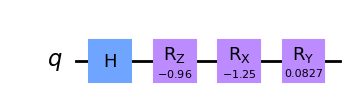

In [412]:
qc.ry(rho(3,P),0)
qc.draw('mpl')

state =  Statevector([0.68609002+0.6265238j , 0.34731895+0.12695658j],
            dims=(2,))


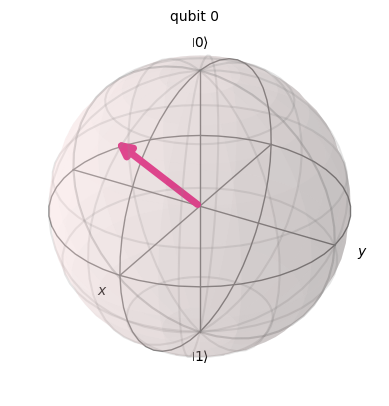

In [413]:
state = Statevector.from_instruction(qc)
print("state = ", state)
plot_bloch_multivector(state)

In [414]:
angle = 0.0827
Ry = np.array([[np.cos(angle),0,np.sin(angle)],
               [0,1,0],
               [-np.sin(angle),0, np.cos(angle)]])
Rotated = Ry.dot(P)

print("Q=", Q, "P=",P,"Rotated P = ", Rotated)

Q= [  7 -10   0] P= [ 0.1827 -0.261   0.9478] Rotated P =  [ 0.26036933 -0.261       0.92946863]


In [415]:
Q_ = np.array([Rotated[0]* Q[1]/Rotated[1], Rotated[1] * Q[1]/Rotated[1],0])
Q_

array([  9.9758364, -10.       ,   0.       ])

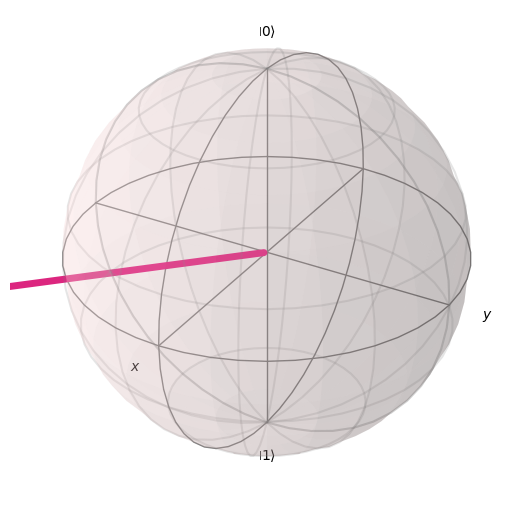

In [419]:
plot_bloch_vector(Q_)

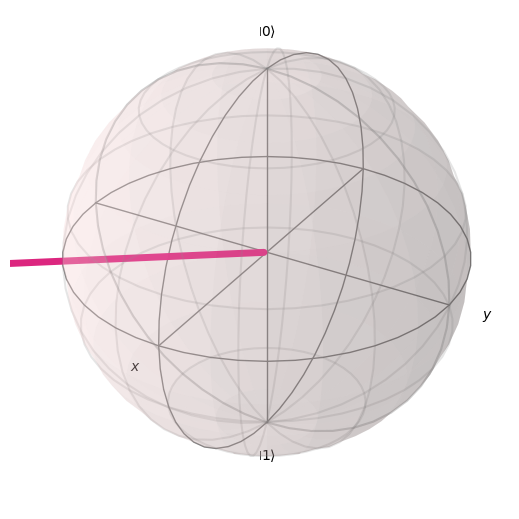

In [420]:
plot_bloch_vector(Q)

## Q(x,y,0)가 $\theta$ 만큼 회전한 경우를 Bloch Sphere 상에서 회전을 통해 구현

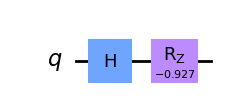

In [541]:
import qiskit
import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector
from qiskit.quantum_info import Statevector

Q = np.array([3,-4,0])

qc_r = QuantumCircuit(1)
qc_r.h(0)
phi = np.arctan2(Q[1],Q[0])
qc_r.rz(phi,0)
qc_r.draw('mpl')

x,y,z =  3 -4 0
k =  0.1379


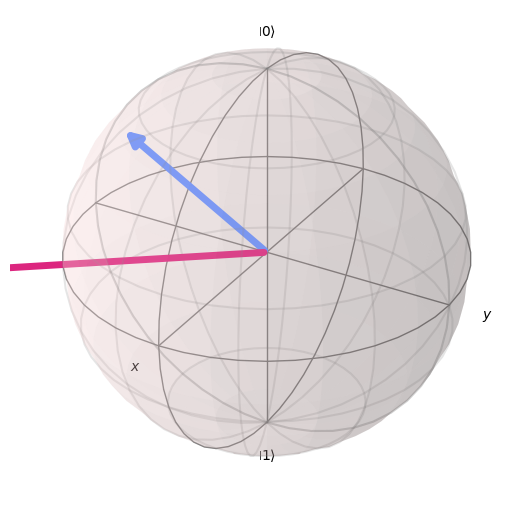

In [542]:
P = project(Q,1,1,1,1)
plot_bloch_vector([Q]+[P])

0.137931 3.4475
theta =  0.8099977707714004


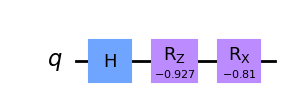

In [543]:
x,y,z = Q
k = round(4 / (x**2 + y**2 + 4), 6)
Inner = Q.dot(P)
print(k, Inner)
theta =  np.arccos(Inner / 
                (np.sqrt((x**2 + y**2)) * np.sqrt(((k * x)**2 + (k * y)**2 + (2*(1-k)-1)**2 ))))

print("theta = ", theta)
qc_r.rx(-theta, 0)
qc_r.draw('mpl')

Statevector([0.70589102+0.53984453j, 0.45669232-0.04144714j],
            dims=(2,))


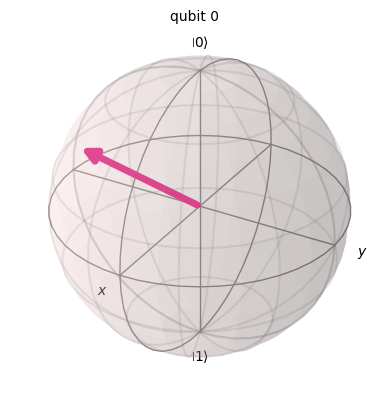

In [537]:
state = Statevector.from_instruction(qc_r)
print(state)
plot_bloch_multivector(state)

Previous state =  Statevector([0.70589102+0.53984453j, 0.45669232-0.04144714j],
            dims=(2,))
phi =  (1.5034116542794351-0.9910862171888885j)
Resized state =  Statevector([0.49914033+0.38172773j, 0.32293024-0.02930755j],
            dims=(2,))


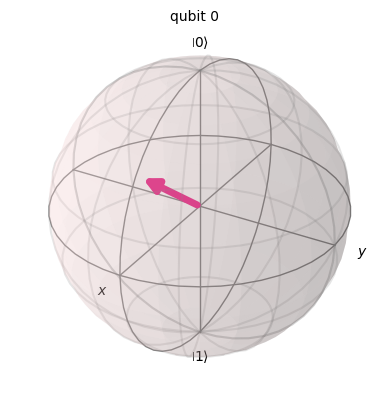

In [531]:
print("Previous state = ", state)

t = 0
for i in range(2):
    t += state[i]

phi_bloch = 2 * np.arccos(np.sqrt(2) * t/2) # Rotation around Z-axis 의 경우 회전 각도의 절반이 exponential의 지수 term으로 들어가므로 마지막에 2배를 해줌.

print("phi = ", phi_bloch )

state = Statevector([state[0]/np.sqrt(2), state[1]/np.sqrt(2)] )

print("Resized state = ", state)

plot_bloch_multivector(state)

In [532]:
x, y = np.real(np.cos(phi_bloch)), np.real(np.sin(phi_bloch)) 
print("(x, y) = ", x, y)
plot_bloch_vector([x,y,0] )
Qixel = np.array([x,y,0])
print(x,y)

(x, y) =  0.10320007608274681 1.5291879434901892
0.10320007608274681 1.5291879434901892


### 만약 Q(x,y,0) 을 30도 만큼 회전시키는 경우

#### 2D image를 회전시킨 경우

In [538]:
from math import pi
Q_xy = np.array([[3],
              [-4]])

Rot = np.array([[np.cos(pi/6), -np.sin(pi/6)],
                [np.sin(pi/6),np.cos(pi/6)]])
Q_prime = Rot.dot(Q_xy) 
Q_prime

array([[ 4.59807621],
       [-1.96410162]])

#### Bloch Sphere를 통해 회전시키는경우

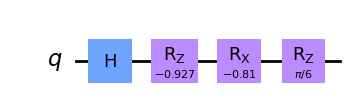

In [544]:
qc_r.rz(pi/6,0)
qc_r.draw('mpl')

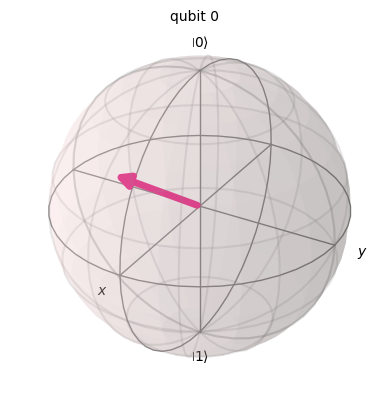

In [545]:
state = Statevector.from_instruction(qc_r)
plot_bloch_multivector(state)

## Time Complexity Analysis

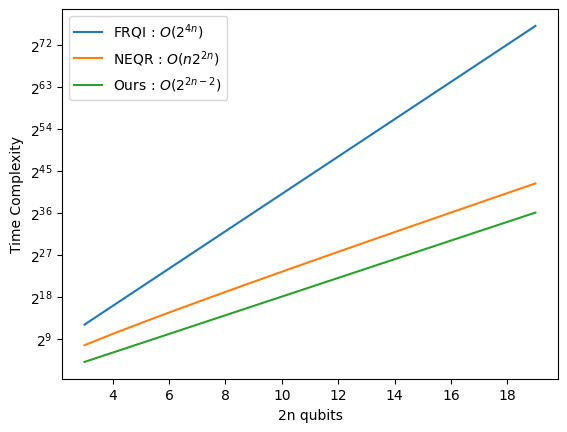

In [704]:
import matplotlib.pyplot as plt

# n qubits can represent 2**n pixels. Thus, Total number of used qubits are 2n qubits.

# Big-O represent of FRQI
n = np.arange(3,20)
n = n.astype(np.float64)
y_frqi = 2**(4*n)

# Big-O represent of NEQR
# Assume q = 1 for initial states.

y_neqr = n*2**(2*n)

# Big-O represent of Ours

y_ours = 2**(2*n-2)

plt.plot(n, y_frqi, label = 'FRQI : $O(2^{4n})$')
plt.plot(n, y_neqr, label = 'NEQR : $O(n2^{2n})$')
plt.plot(n, y_ours, label = 'Ours : $O(2^{2n-2})$')
plt.xlabel('2n qubits')
plt.ylabel('Time Complexity')
plt.yscale('log', base=2)
plt.legend()

plt.show()